ASSIGNMENT 2 ANSWERS

1. IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. LOADING DATASET

In [2]:
df=pd.read_csv("C:\\Users\\mylie\\Dropbox\\PC\\Downloads\\titanic.csv")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

3. VISUALIZATIONS

a. UNIVARIATE ANALYSIS

In [5]:
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

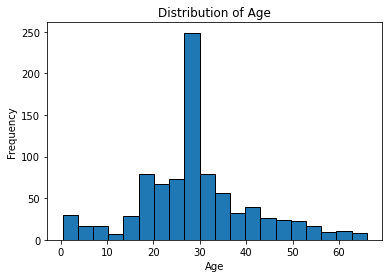

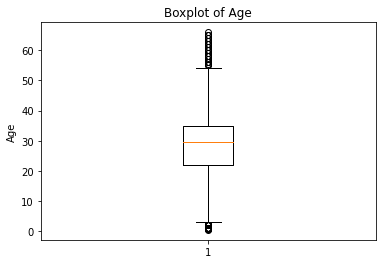

In [24]:
# Plotting histogram
x = df['age']
plt.hist(x , bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Plotting boxplot
plt.boxplot(df['age'])
plt.ylabel('Age')
plt.title('Boxplot of Age')
plt.show()

b. BIVARIATE ANALYSIS

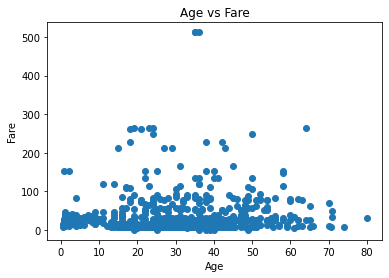

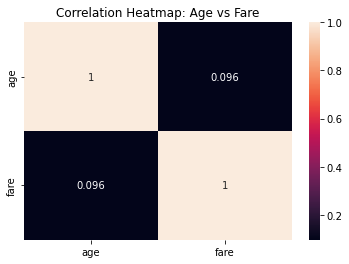

In [7]:

x = df['age']
y = df['fare']

# Scatter plot
plt.scatter(x , y)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

# Correlation heatmap
sns.heatmap(df[['age', 'fare']].corr(), annot=True)
plt.title('Correlation Heatmap: Age vs Fare')
plt.show()

c. MULTIVARIATE ANALYSIS

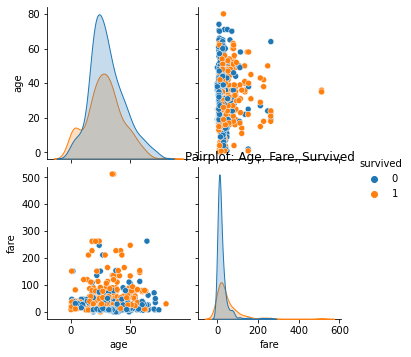

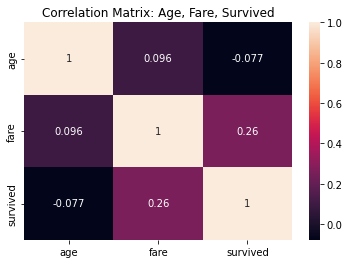

In [8]:
subset = df[['age', 'fare', 'survived']]

# Pairplot
sns.pairplot(subset, hue='survived')
plt.title('Pairplot: Age, Fare, Survived')
plt.show()

# Correlation matrix
corr_matrix = subset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix: Age, Fare, Survived')
plt.show()

4. DESCRIPTIVE STATISTICS

In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


5. Handling missing values

In [10]:
#checking missing values
check=df.isnull().sum()
check

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
#dropping missing values
drop=df.dropna()
drop.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [12]:
#for numeric missing values use MEAN for replacing values here column -> age

df['age'].fillna(df['age'].mean(), inplace=True)
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [13]:
#for categorical missing values use MODE for replacing values here column -> deck, embracked,embrack_town

df['deck'].fillna(df['deck'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


In [14]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

6. Finding outliers and replacing them

In [15]:
# CHECKING FOR OUTLIERS IN AGE

# Using the Z-score method


# Select numerical columns for outlier detection
numeric_columns = ['age', 'fare']

# Function to detect and replace outliers using Z-score method
def replace_outliers_zscore(df, column):
    # Calculate Z-score for the column
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    
    # Define threshold for outliers (e.g., Z-score > 3)
    threshold = 3
    
    # Replace outliers with median value
    df.loc[z_scores > threshold, column] = df[column].median()
    
    return df

# Replace outliers in each numerical column using Z-score method
for column in numeric_columns:
    df = replace_outliers_zscore(df, column)


df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.363982,0.523008,0.381594,26.259105
std,0.486592,0.836071,12.431351,1.102743,0.806057,29.074664
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,29.412500
max,1.000000,3.000000,66.000000,8.000000,6.000000,164.866700


7. Check for Categorical columns

In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns


Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

Encoding

In [17]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


df[categorical_columns]

,sex,embarked,class,who,deck,embark_town,alive
0,1,2,2,1,2,2,0
1,0,0,0,2,2,0,1
2,0,2,2,2,2,2,1
3,0,2,0,2,2,2,1
4,1,2,2,1,2,2,0
...,...,...,...,...,...,...,...
886,1,2,1,1,2,2,0
887,0,2,0,2,1,2,1
888,0,2,2,2,2,2,0
889,1,0,0,1,2,0,1


8. Spliting the data into dependent and independent variables

In [18]:
# Independent variables (features)
X = df.drop('survived', axis=1) 
print('Independent variables: ', X)

# Dependent variable (target)
y = df['survived'] 
print('Dependent variable: ' , y)

Independent variables:       pclass  sex        age  sibsp  parch     fare  embarked  class  who  \
0         3    1  22.000000      1      0   7.2500         2      2    1   
1         1    0  38.000000      1      0  71.2833         0      0    2   
2         3    0  26.000000      0      0   7.9250         2      2    2   
3         1    0  35.000000      1      0  53.1000         2      0    2   
4         3    1  35.000000      0      0   8.0500         2      2    1   
..      ...  ...        ...    ...    ...      ...       ...    ...  ...   
886       2    1  27.000000      0      0  13.0000         2      1    1   
887       1    0  19.000000      0      0  30.0000         2      0    2   
888       3    0  29.699118      1      2  23.4500         2      2    2   
889       1    1  26.000000      0      0  30.0000         0      0    1   
890       3    1  32.000000      0      0   7.7500         1      2    1   

     adult_male  deck  embark_town  alive  alone  
0          T

9. Scaling the independent variables

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the independent variables
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[ 0.82737724  0.73769513 -0.59270449 ...  0.58595414 -0.78927234
  -1.2316449 ]
 [-1.56610693 -1.35557354  0.69508685 ... -1.9423032   1.2669898
  -1.2316449 ]
 [ 0.82737724 -1.35557354 -0.27075665 ...  0.58595414  1.2669898
   0.81192233]
 ...
 [ 0.82737724 -1.35557354  0.02697408 ...  0.58595414 -0.78927234
  -1.2316449 ]
 [-1.56610693  0.73769513 -0.27075665 ... -1.9423032   1.2669898
   0.81192233]
 [ 0.82737724  0.73769513  0.2121651  ... -0.67817453 -0.78927234
   0.81192233]]


10. Spliting the data into training and testing

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print('Training Feature Set: ')
print(X_train)
print('Training Target Set: ')
print(y_train)

Training Feature Set: 
     pclass  sex        age  sibsp  parch      fare  embarked  class  who  \
331       1    1  45.500000      0      0   28.5000         2      0    1   
733       2    1  23.000000      0      0   13.0000         2      1    1   
382       3    1  32.000000      0      0    7.9250         2      2    1   
704       3    1  26.000000      1      0    7.8542         2      2    1   
813       3    0   6.000000      4      2   31.2750         2      2    0   
..      ...  ...        ...    ...    ...       ...       ...    ...  ...   
106       3    0  21.000000      0      0    7.6500         2      2    2   
270       1    1  29.699118      0      0   31.0000         2      0    1   
860       3    1  41.000000      2      0   14.1083         2      2    1   
435       1    0  14.000000      1      2  120.0000         2      0    0   
102       1    1  21.000000      0      1   77.2875         2      0    1   

     adult_male  deck  embark_town  alive  alone  
3